In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
df = pd.read_excel("Iris.xls")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   iris          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
X = df.drop(["iris"],axis=1)
Y = df["iris"].to_frame()

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.33)

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

c:\Users\Özdemir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [23]:
y_pred = log_reg.predict(X_test)

In [31]:
cm = confusion_matrix(y_true=Y_test,y_pred=y_pred)
cm

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  2, 13]], dtype=int64)

In [40]:
knn = KNeighborsClassifier(n_neighbors=3,metric="minkowski")
knn.fit(X_train,Y_train)

c:\Users\Özdemir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred = knn.predict(X_test)

In [42]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]], dtype=int64)

In [52]:
svc = SVC(kernel="sigmoid")
svc.fit(X_train,Y_train)

c:\Users\Özdemir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [53]:
y_pred = svc.predict(X_test)

In [54]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[16,  0,  0],
       [ 0, 13,  6],
       [ 0,  0, 15]], dtype=int64)

<Axes: xlabel='sepal width', ylabel='petal length'>

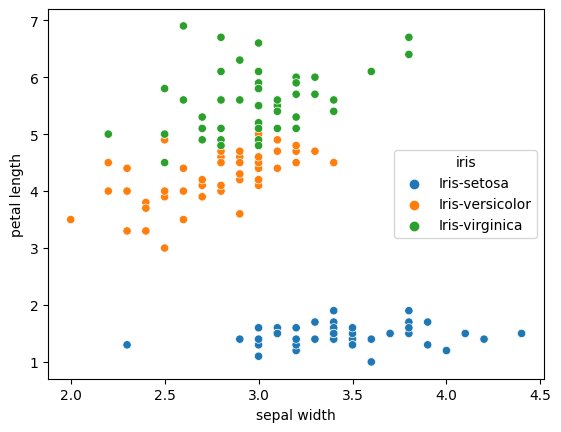

In [57]:
sns.scatterplot(x=df["sepal width"],y=df["petal length"],hue=df["iris"])

In [58]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

c:\Users\Özdemir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [59]:
y_pred = gnb.predict(X_test)

In [61]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[16,  0,  0],
       [ 0, 19,  0],
       [ 0,  2, 13]], dtype=int64)

In [66]:
dec_tree = DecisionTreeClassifier(criterion="entropy")
dec_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [67]:
y_pred = dec_tree.predict(X_test)

In [68]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]], dtype=int64)

In [70]:
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,Y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
cm

C:\Users\Özdemir\AppData\Local\Temp\ipykernel_16780\3809328554.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,Y_train)


array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]], dtype=int64)